
# BoomBikes Demand Prediction

This Jupyter notebook contains the data analysis and multiple linear regression model building process for predicting the demand for shared bikes.

## Steps
1. Data preparation and cleaning.
2. Exploratory data analysis (EDA).
3. Model building and evaluation.
4. Interpretation of results.

## Data Exploration


In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

df = pd.read_csv('C:/Users/themo/OneDrive/Documents/upGrad/16-07-2024/Linear Regression Assignment/day.csv')

# Convert categorical variables
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear/Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})
df['yr'] = df['yr'].map({0: 2018, 1: 2019})

# Drop unnecessary columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# Data exploration
df.describe()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2018.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000



## Correlation Matrix
Below is the correlation matrix of the features.


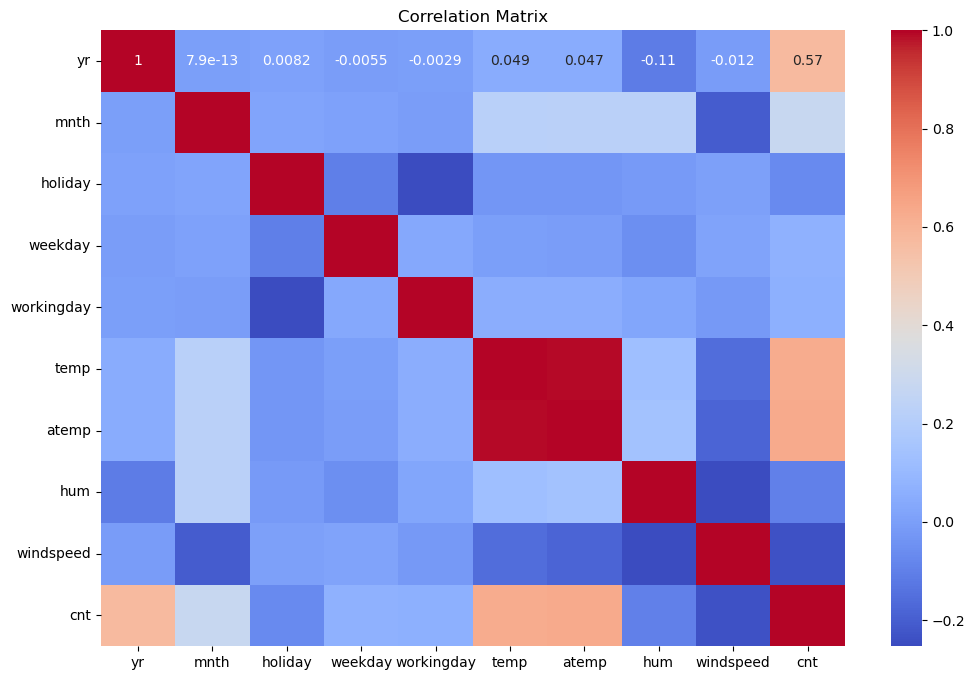

In [14]:

# Display correlation matrix
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



## Pairplot
Below is the pairplot of the features.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

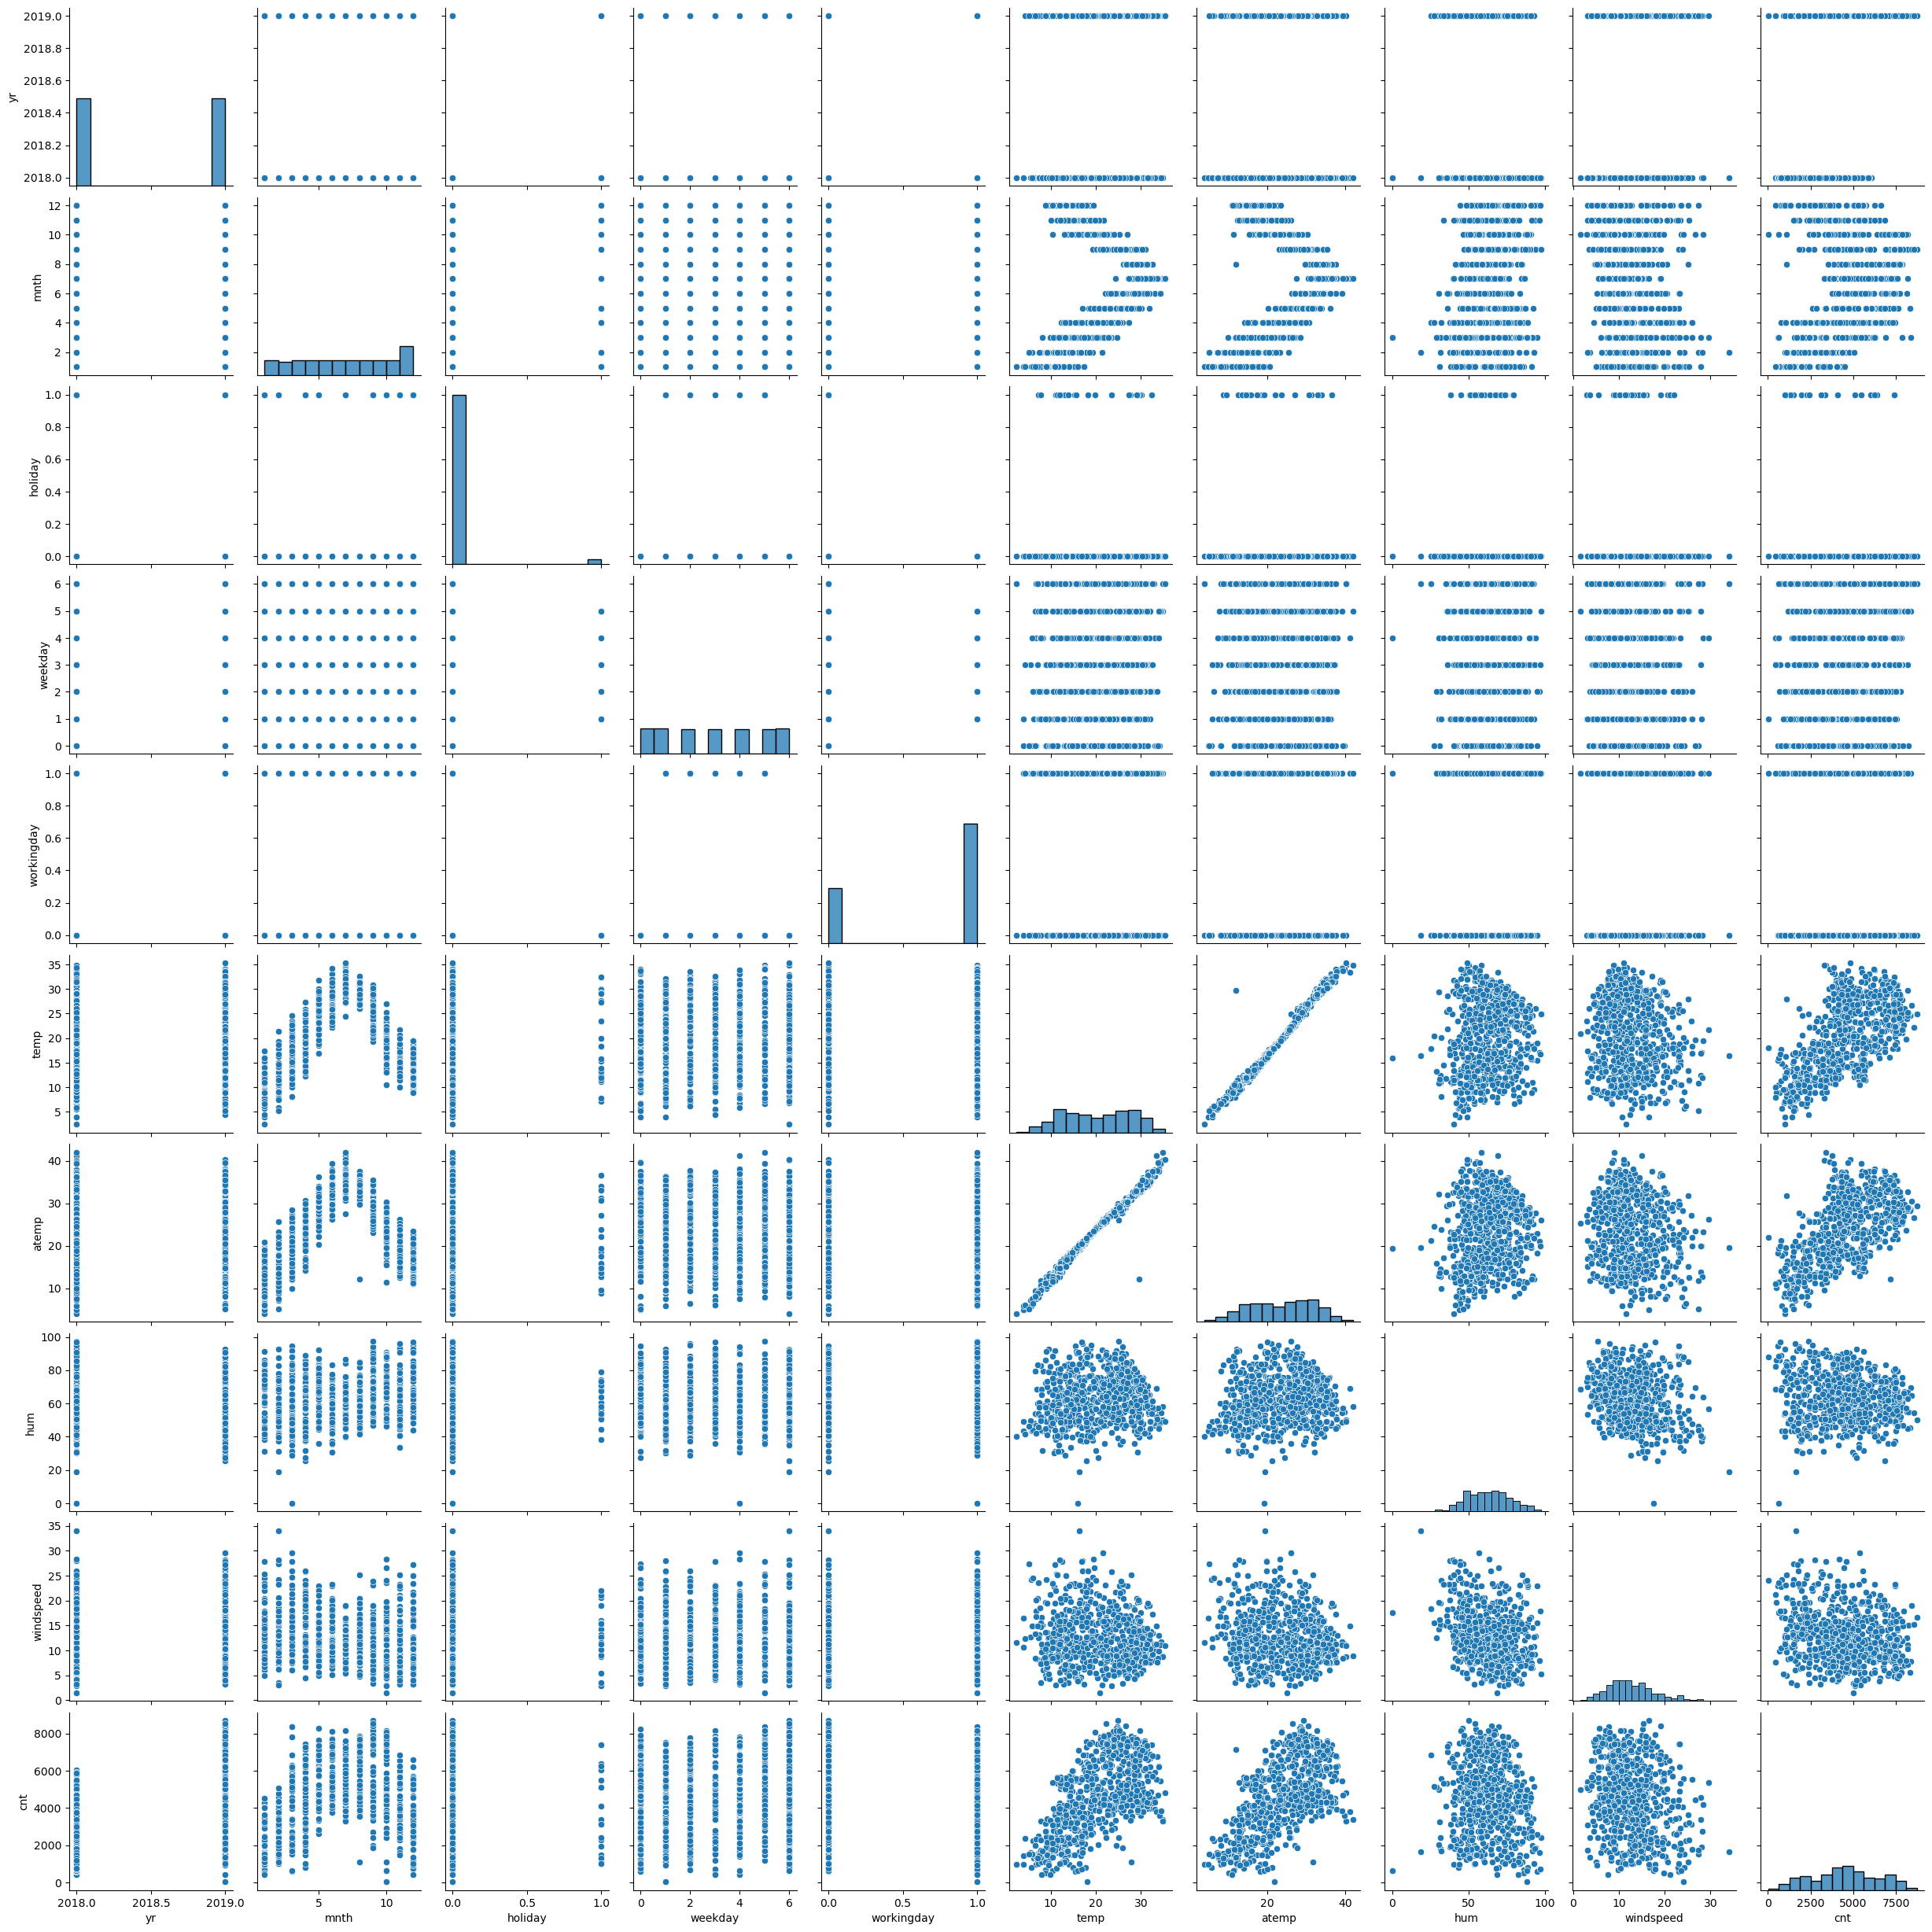

In [15]:

# Display pairplot
sns.pairplot(numeric_df)
plt.show()



## Model Building
We will create dummy variables for categorical features and split the data into training and testing sets.


In [16]:

# Create dummy variables and split data
df = pd.get_dummies(df, drop_first=True)
X = df.drop(['cnt'], axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Model Evaluation
We will build a linear regression model, evaluate its performance using R-squared, Mean Squared Error, and Root Mean Squared Error.


In [17]:

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2, mse, rmse


(0.8291379087166022, 633994.1256077813, 796.2374806599984)


## Coefficients
Below are the coefficients of the model.


In [18]:

# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients


,Coefficient
yr,1975.903385
mnth,-34.478646
holiday,-473.741593
weekday,60.093255
workingday,140.502921
temp,66.926271
atemp,51.398500
hum,-10.775988
windspeed,-35.938486
season_spring,-1096.654843



## Variance Inflation Factor (VIF)
Below is the VIF to check for multicollinearity.


In [19]:

# Check for multicollinearity
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif


,Features,VIF
0,yr,105.673408
1,mnth,15.733945
2,holiday,1.117367
3,weekday,3.312598
4,workingday,3.408139
5,temp,588.139371
6,atemp,633.117762
7,hum,39.097754
8,windspeed,8.636213
9,season_spring,7.407750



## Residual Analysis
We will perform residual analysis to validate the assumptions of linear regression.


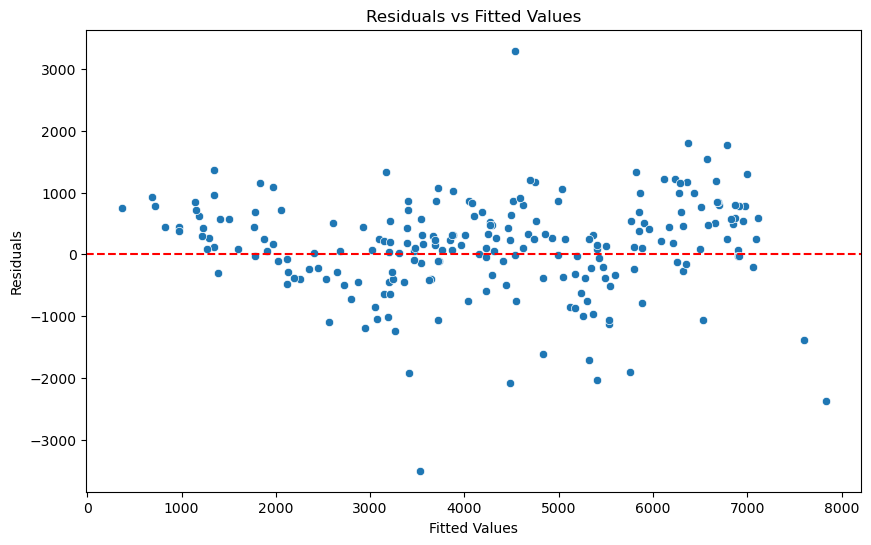

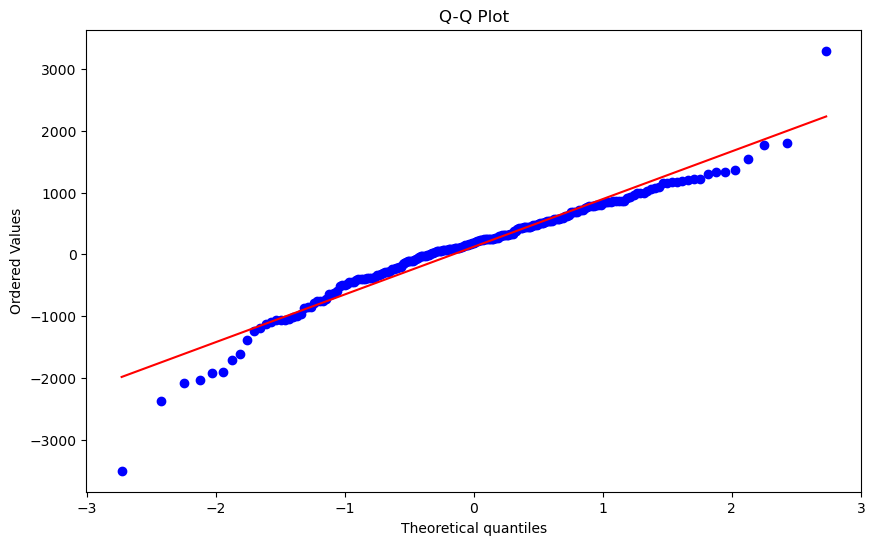

In [20]:

# Residual analysis
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()
